In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bonf_pval    = pd.read_csv('./data/BONF_PVAL_GEM2NET_UNIQLINK', 
                           sep = '\t', index_col=0)
logratio     = pd.read_csv('./data/LOG_RATIO_GEM2NET_UNIQLINK', 
                           sep = '\t', index_col=0)
genes_matrix = pd.read_csv('./data/matricePLM_genes.txt', sep = '\t')

In [3]:
print(f'The size of the bonf_pval matrix is { bonf_pval.shape }')
print(f'The size of the logratio matrix is {logratio.shape}')
print(f'The size of the matrix PLM genes is {genes_matrix.shape}')

The size of the bonf_pval matrix is (17543, 387)
The size of the logratio matrix is (17543, 387)
The size of the matrix PLM genes is (13854, 178)


In [4]:
def null_values_colums(dataframe):
    result = dataframe.isnull().sum()
    return result[result != 0] 

In [5]:
print(null_values_colums(bonf_pval))
print(null_values_colums(logratio))
print(null_values_colums(genes_matrix))

print(null_values_colums(bonf_pval).sum())
print(null_values_colums(logratio).sum())
print(null_values_colums(genes_matrix).sum())

1101     39
1104     21
29       66
30       92
1977     32
       ... 
798      45
801     115
1296    338
1677     36
1672     41
Length: 387, dtype: int64
1101     1
1104     1
855     13
491      9
498      4
        ..
1562     1
1565     1
1296    23
1677     6
1672    12
Length: 94, dtype: int64
Series([], dtype: int64)
34957
523
0


In [6]:
bonf_pval_corrected = bonf_pval.copy()
bonf_pval_corrected[bonf_pval_corrected.isnull() == True] = 1

print(f'The new matrix has {null_values_colums(bonf_pval_corrected).sum()} missing values')

The new matrix has 0 missing values


/home/jhonatan/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


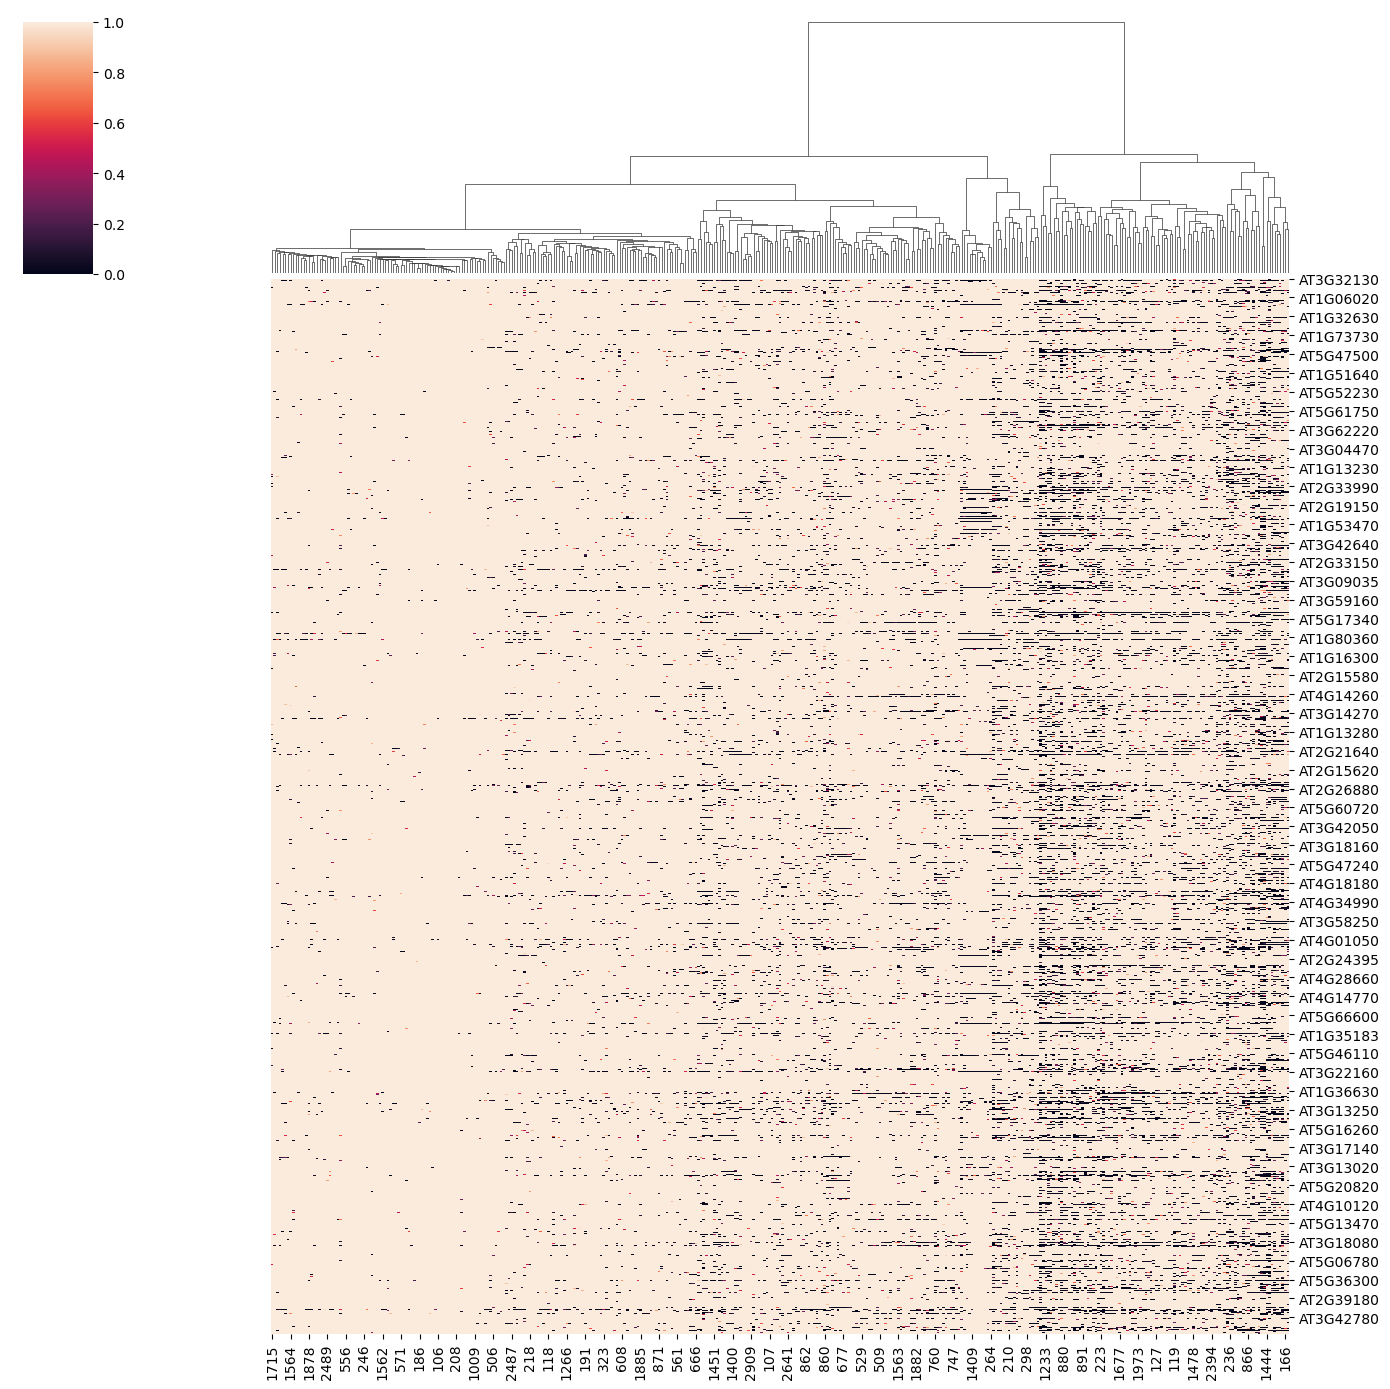

In [14]:
heatmap_pval = sns.clustermap(bonf_pval_corrected, method = 'ward', dendrogram_ratio = 0.2, row_cluster = False, figsize=(14, 14))

/home/jhonatan/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


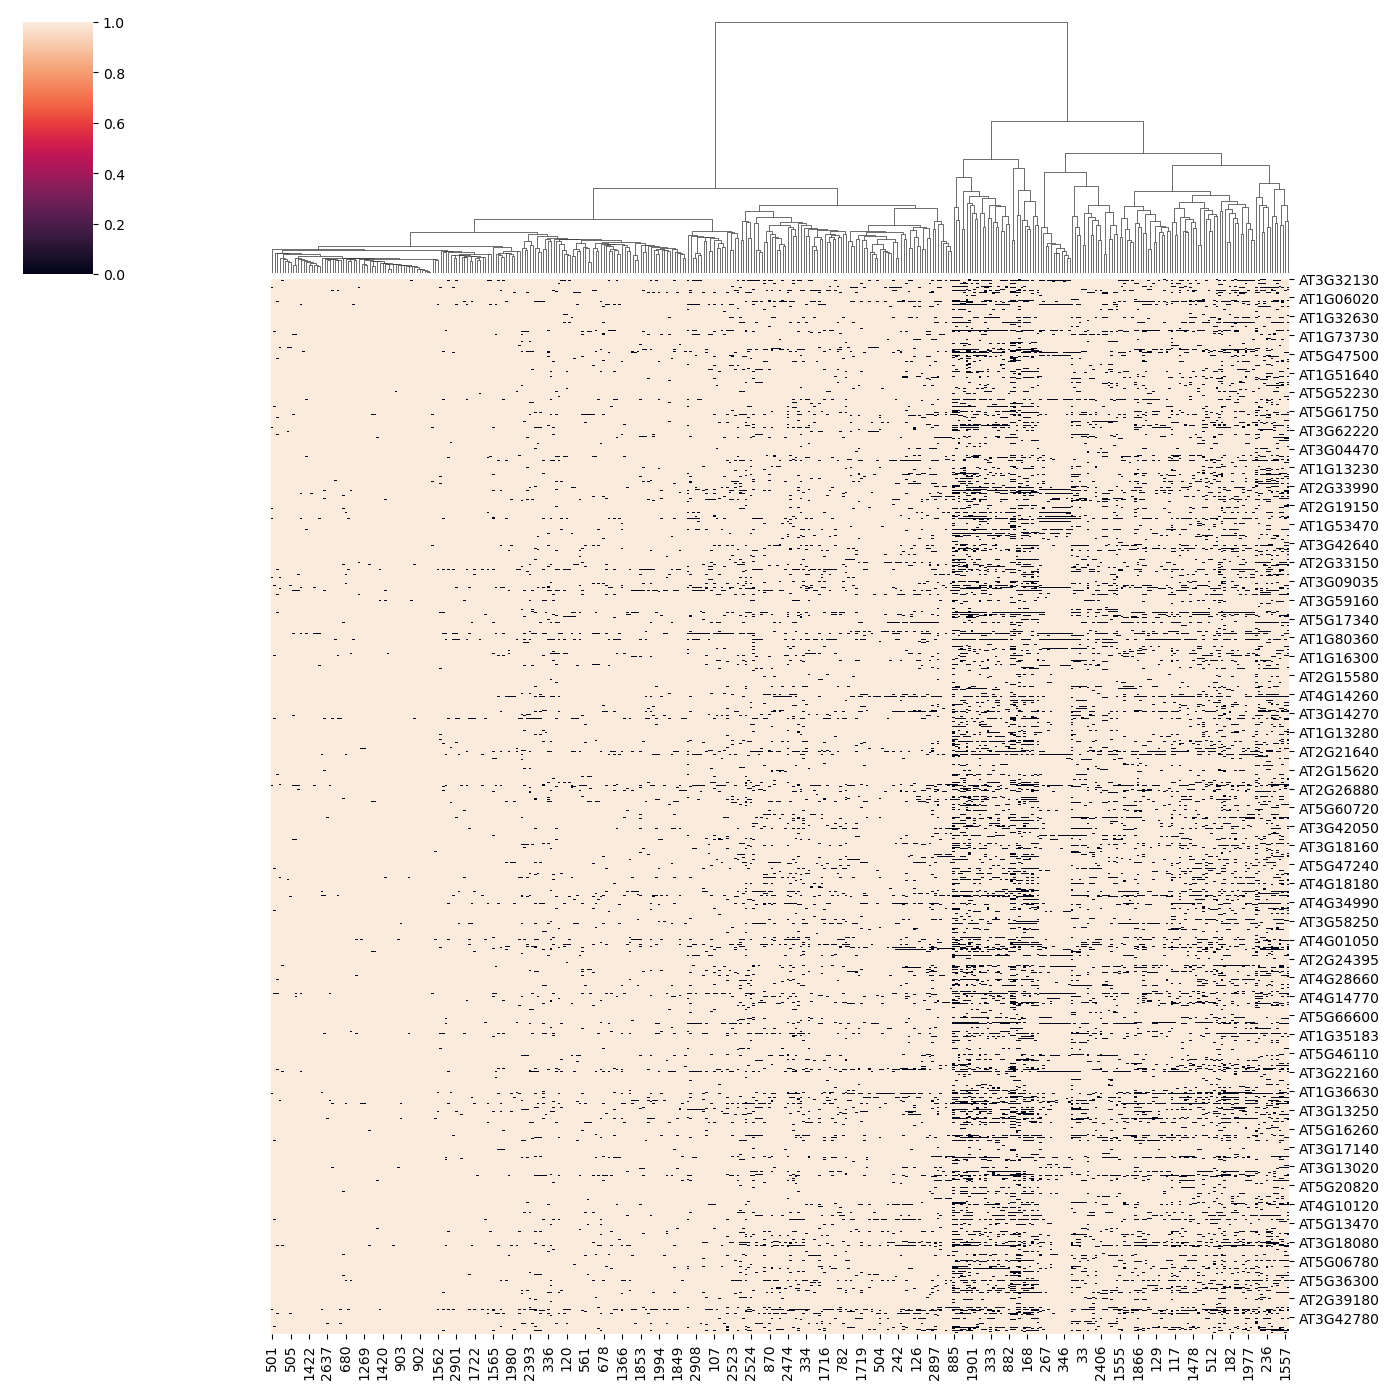

In [8]:
bonf_pval_corrected_mask = (bonf_pval_corrected > 0.05).astype(int)
bonf_pval_corrected_mask.head()

heatmap_corrected = sns.clustermap(bonf_pval_corrected_mask, method = 'ward' ,row_cluster = False, figsize=(14, 14))

/home/jhonatan/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


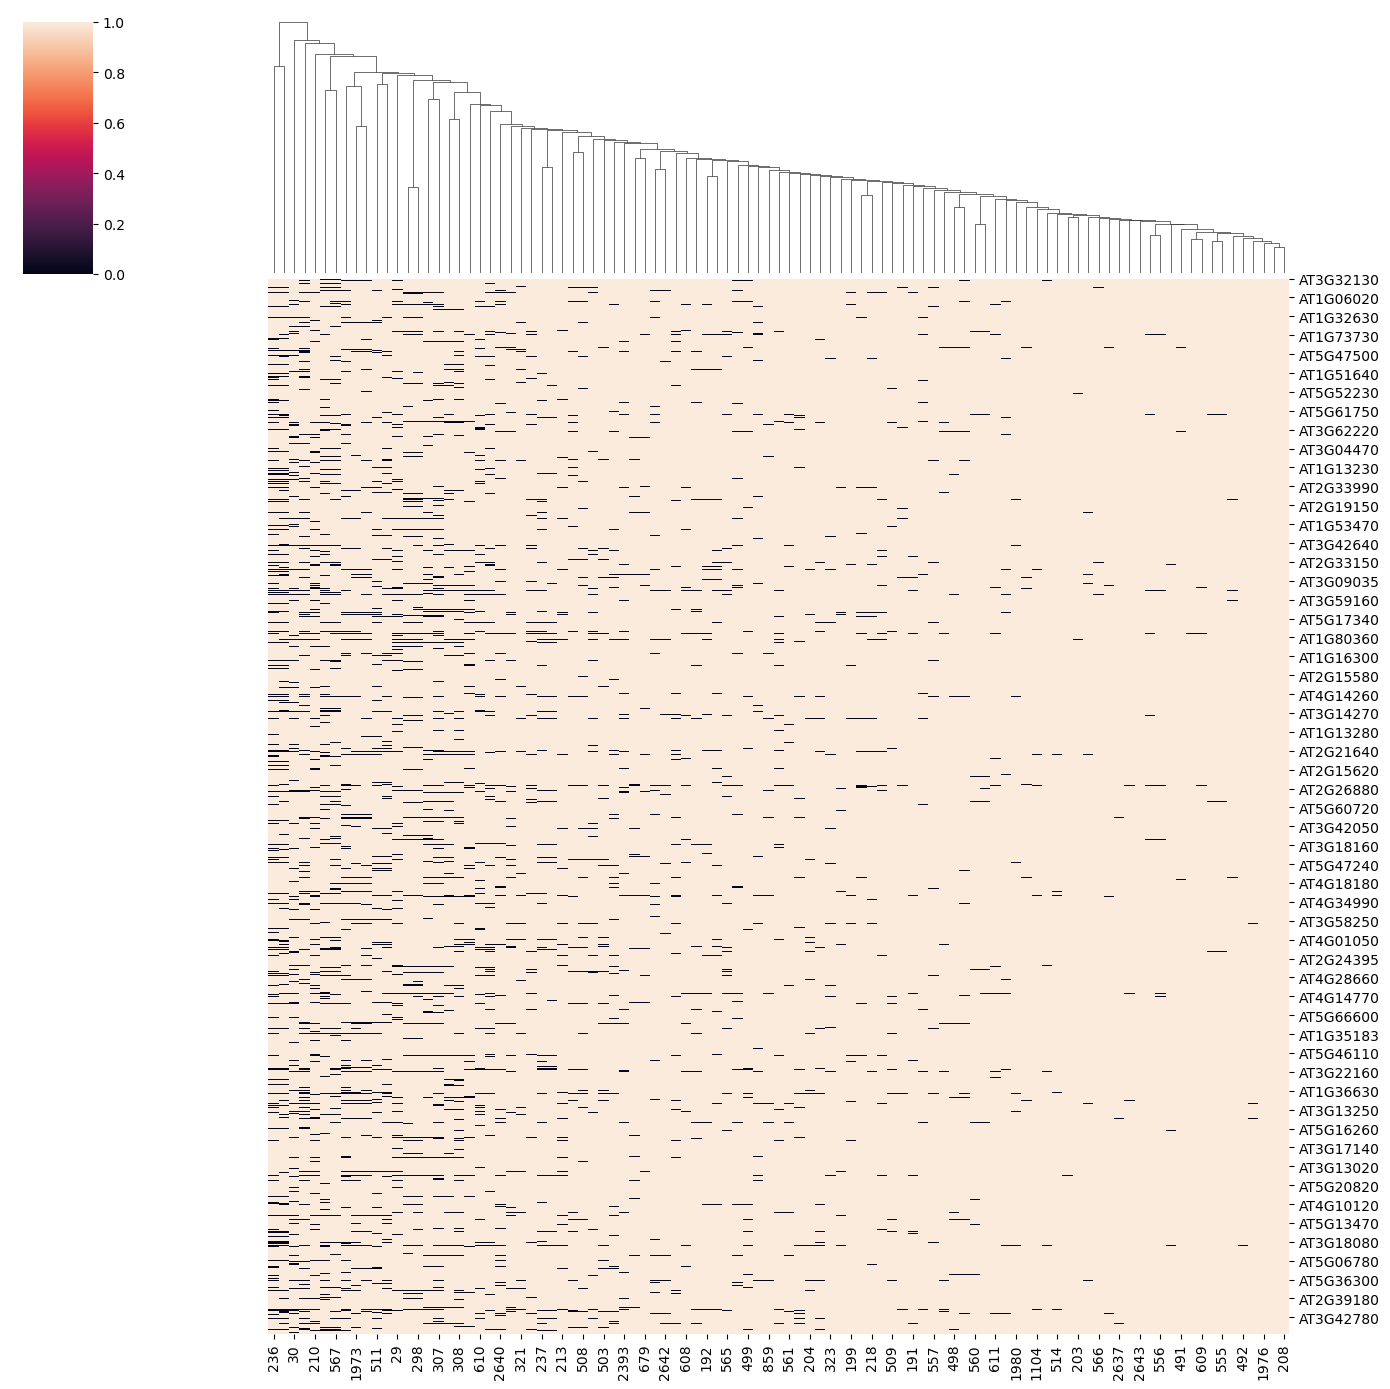

In [9]:
test_correlation = bonf_pval_corrected_mask.iloc[:, 1:100]

heatmap_test = sns.clustermap(test_correlation, row_cluster = False, figsize=(14, 14))